In [19]:
%load_ext autoreload
%autoreload 2

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

In [2]:
ser=serial.Serial("/dev/ttyACM0",115200,timeout=2)
ser.baudrate=115200

Check:  0 False
Check:  1 False
Check:  2 False
Check:  3 False
Check:  4 False
Check:  5 False
Check:  6 False
Check:  7 False
Check:  8 False
Check:  9 False


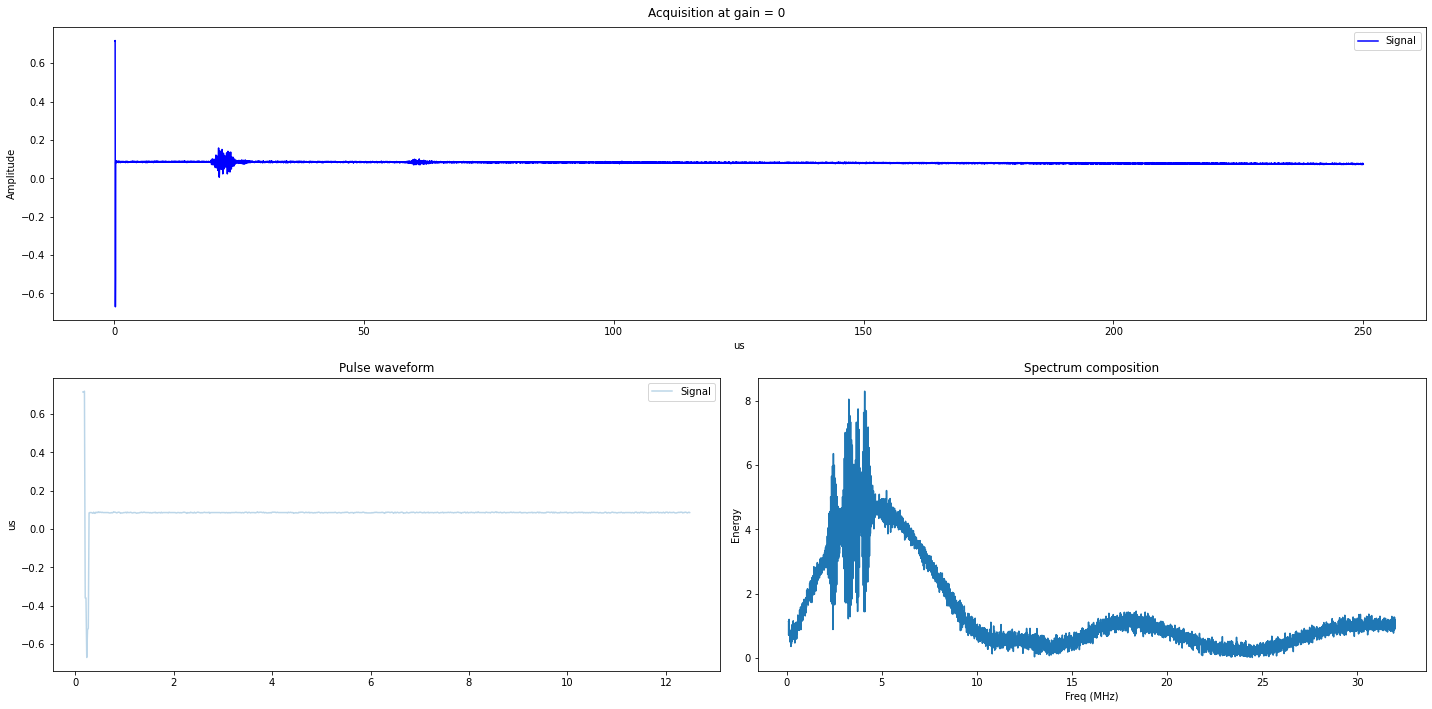

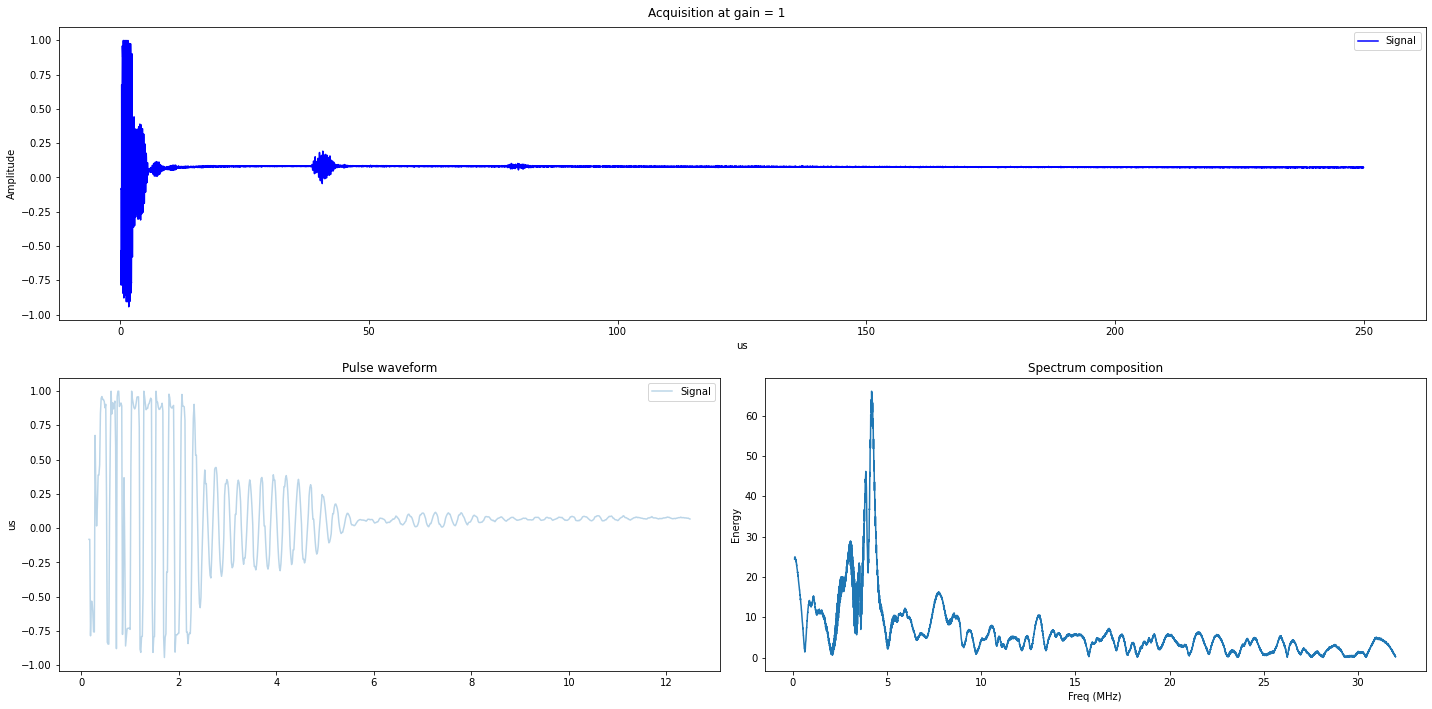

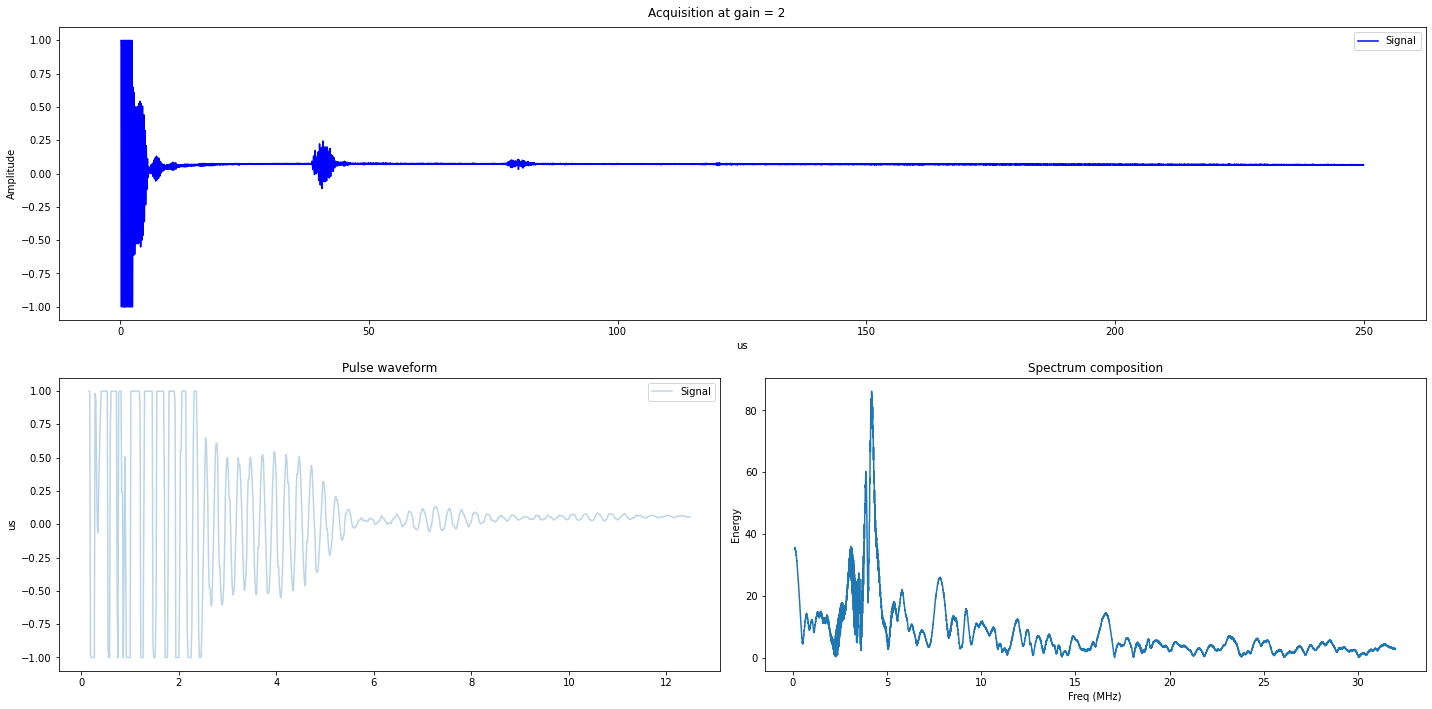

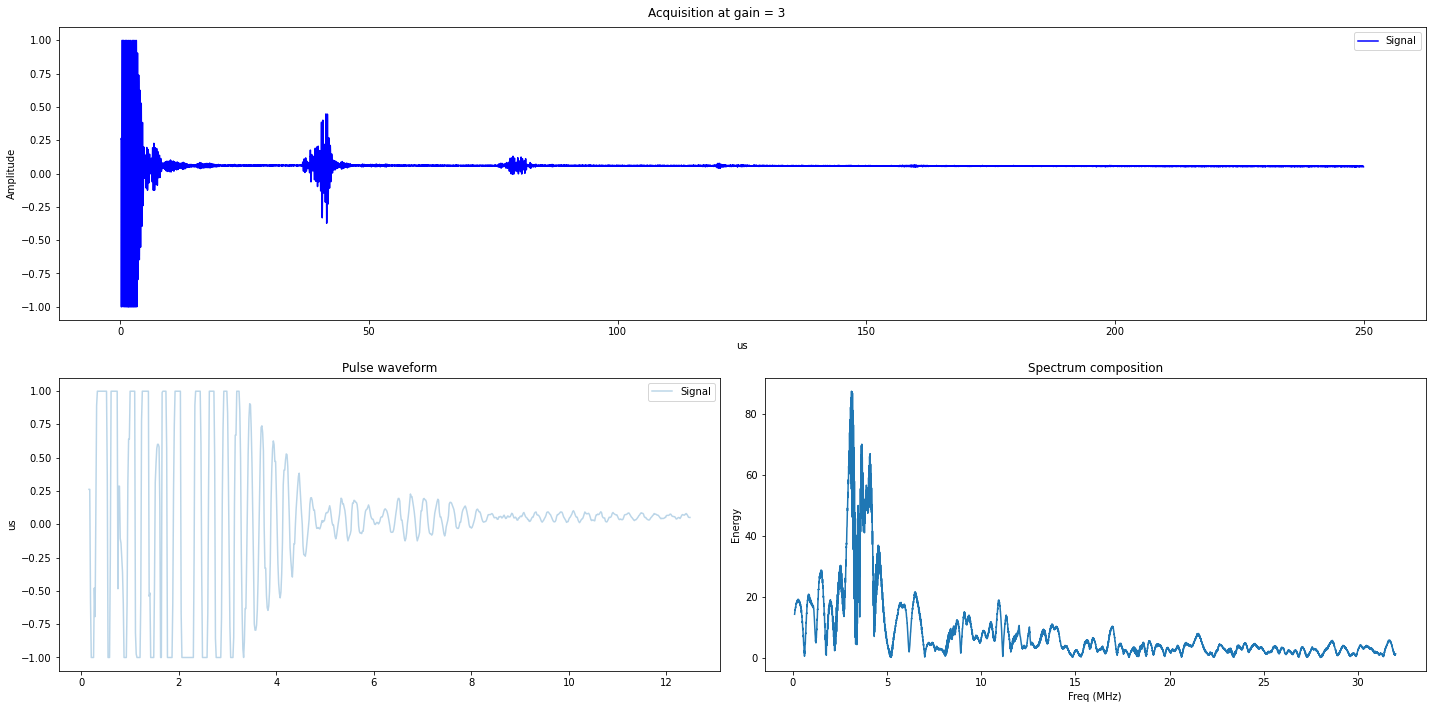

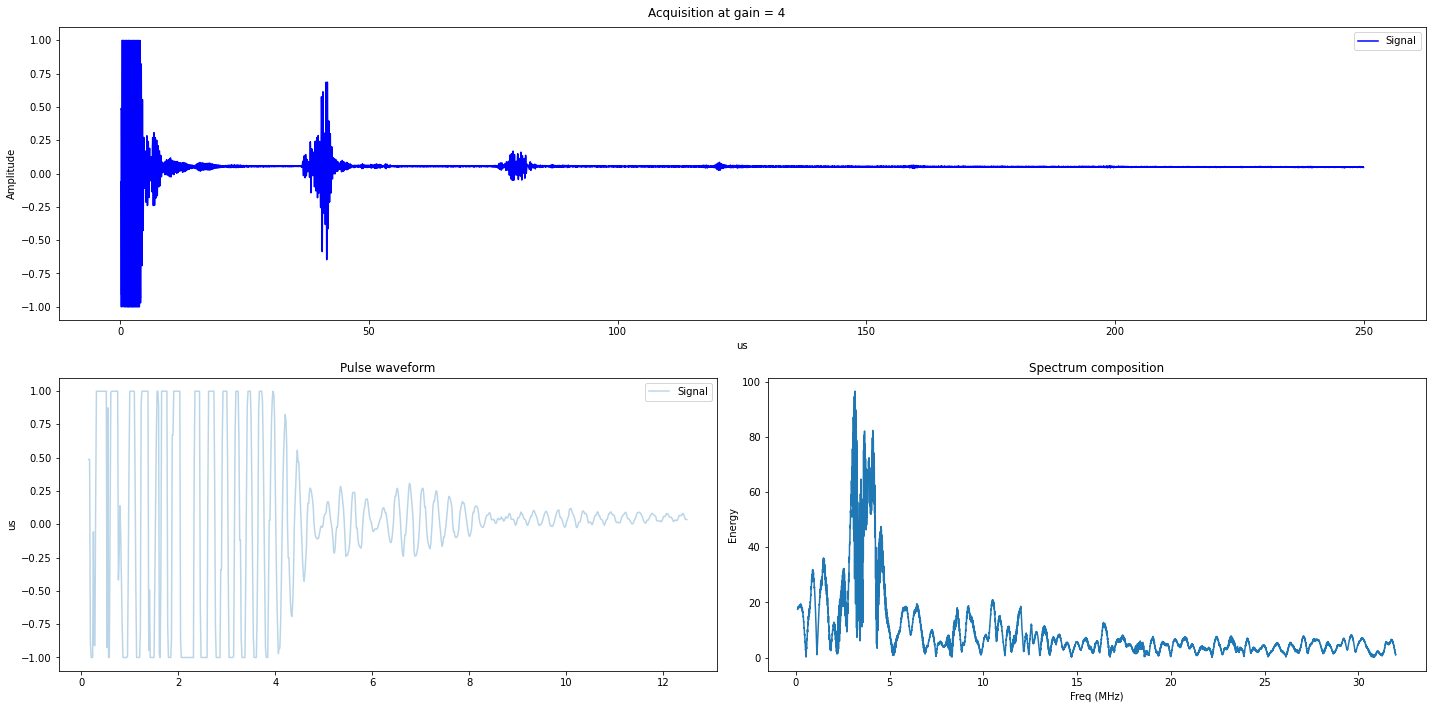

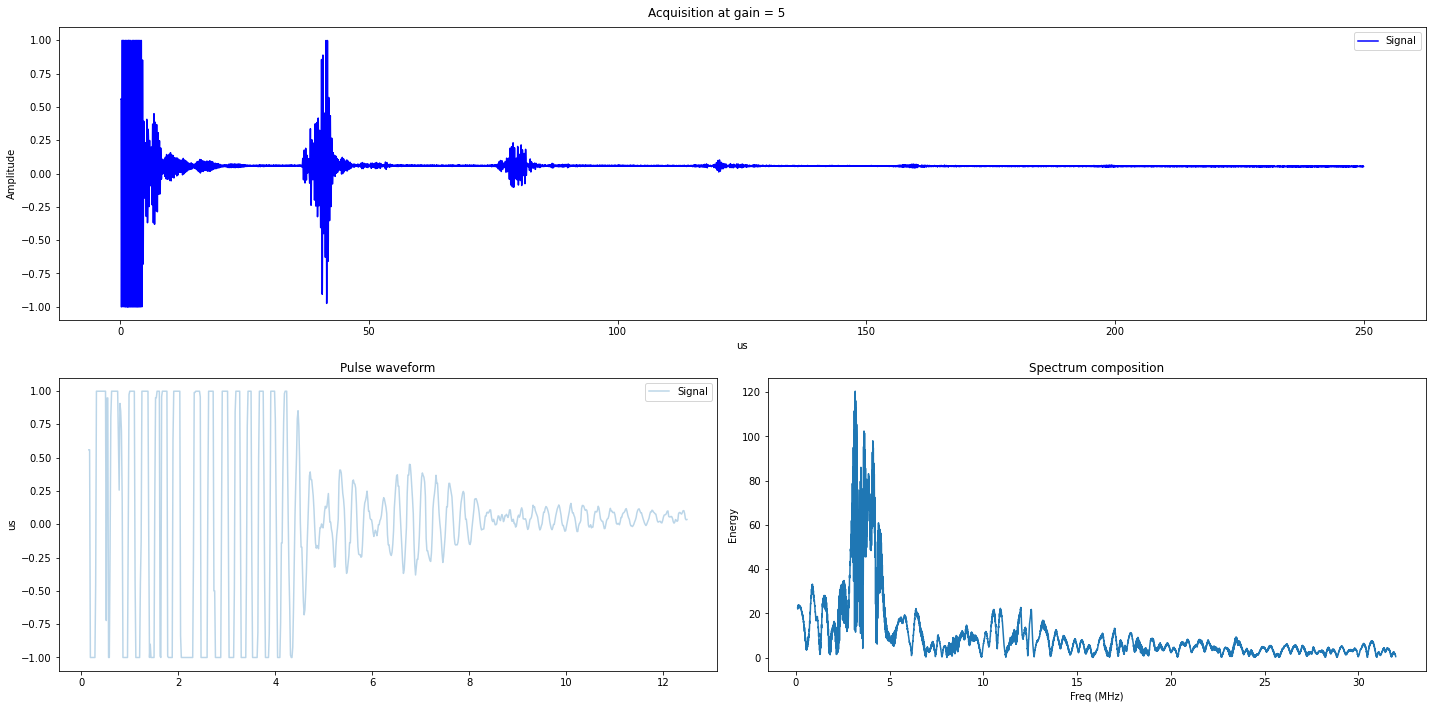

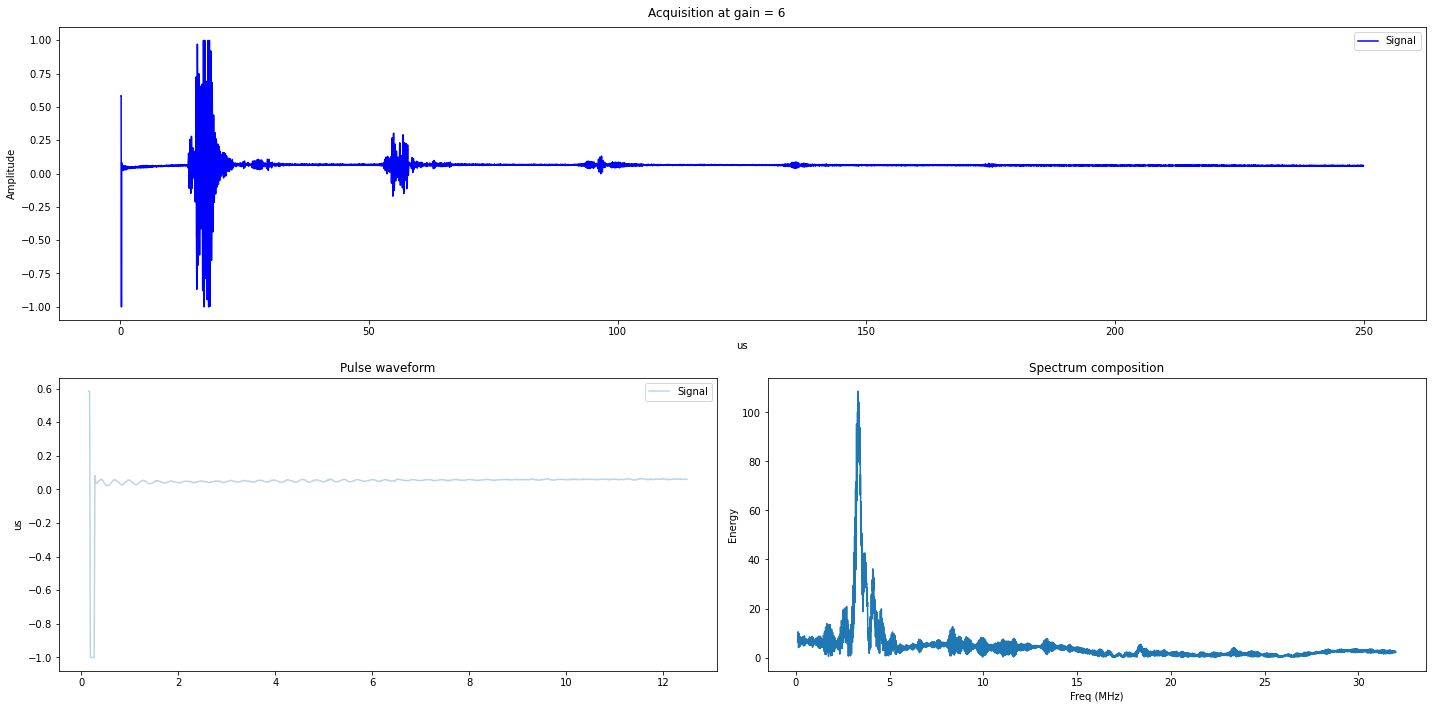

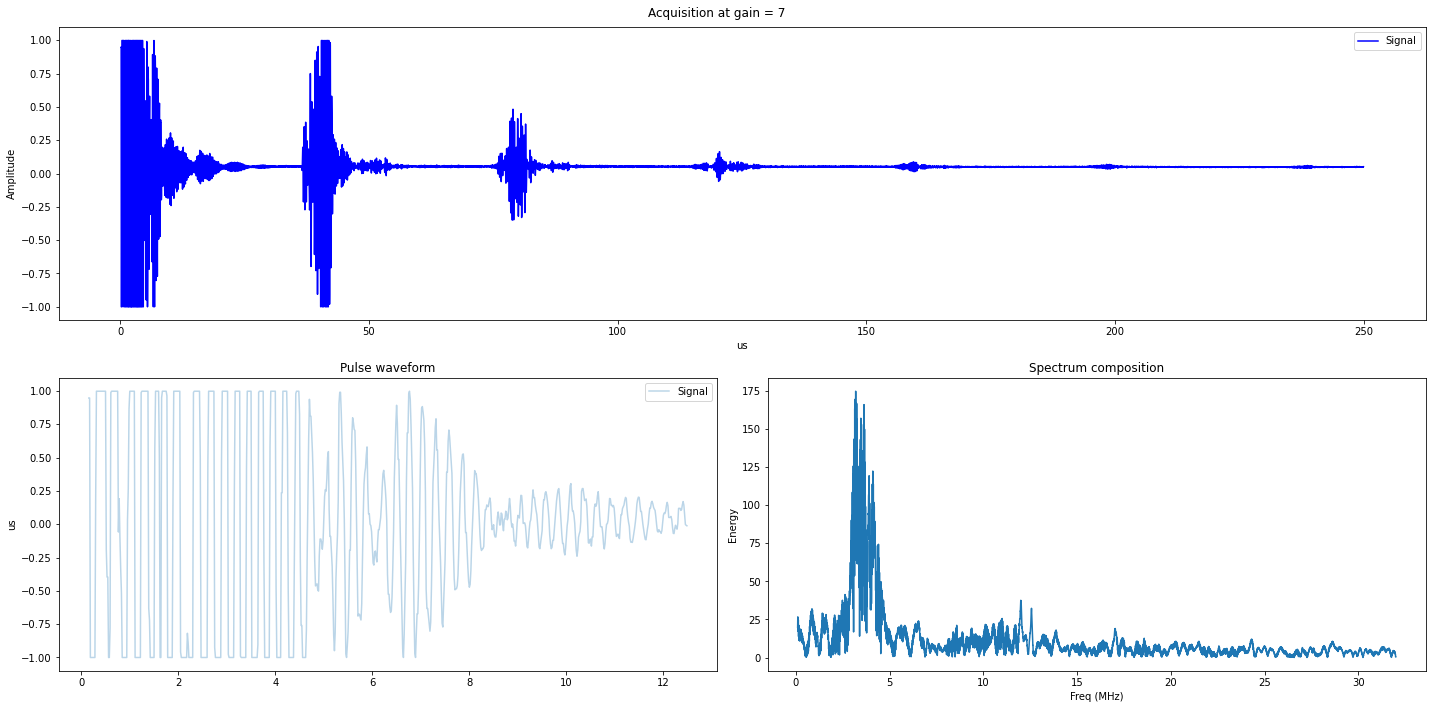

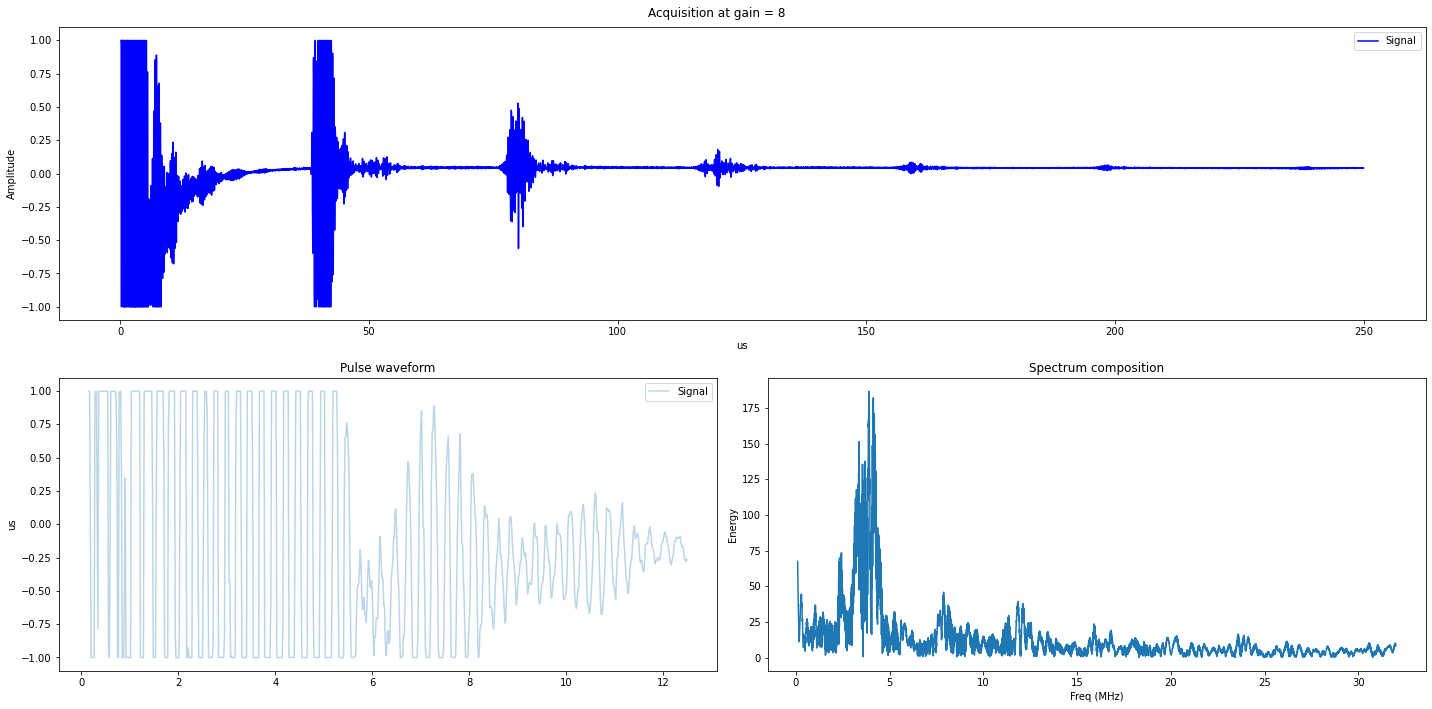

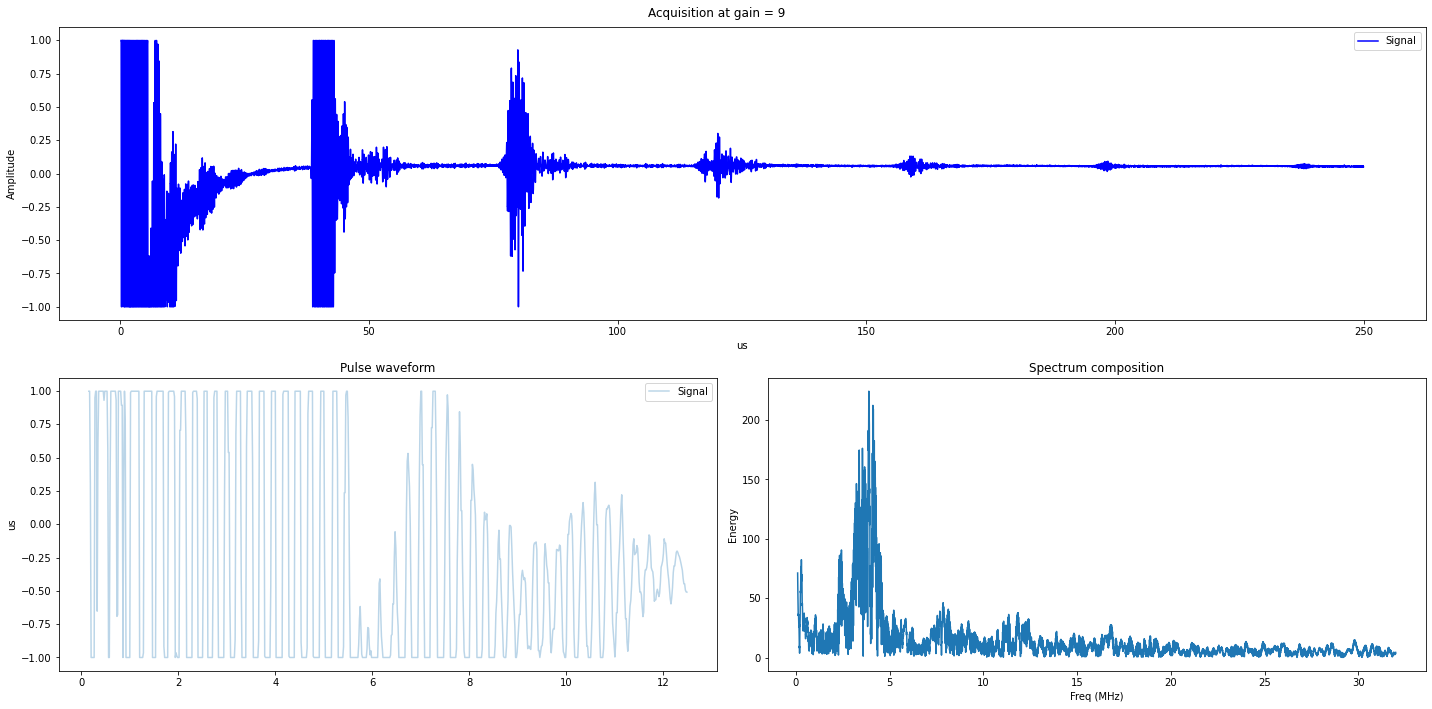

In [51]:
for G in range (10):
    ser.write(bytearray(str(G),'ascii'))
    ser.write(bytearray('1','ascii'))
    A = ser.readline()
    B = ser.readline()
    C = ser.readline()
    assert C == b'----------Start of ACQ----------\r\n'
    F = []
    while True: # Run forever

        read_ser=ser.readline()
        if (read_ser != b''):
            F.append(read_ser)
        else:
            break
    print("Check: ",G,len(F[0]) == 64002)

    now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
    S = str(F[0])[2:].split(",")[:-1]
    signal = [(int(x,16)-512)/512.0 for x in S]
    t = [x/64.0 for x in range(len(signal))]
    f = [k*64/len(signal) for k in range(len(signal))]

    data = {"signal":signal,"t":t,"f":f,"gain":G,"timestamp":now}

    m=800

    FFT = np.abs(np.fft.fft(signal))

    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)

    plt.plot(t[10:],signal[10:],"b",label="Signal")
    plt.xlabel("us")
    plt.ylabel("Amplitude")
    plt.legend()
    title = "Acquisition at gain = " + str(G)

    plt.subplot(2, 2, 3)
    plt.plot(t[10:m],signal[10:m],alpha=0.3,label="Signal")
    plt.title('Pulse waveform')
    plt.ylabel('V')
    plt.ylabel('us')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Spectrum composition')
    plt.plot(f[25:len(FFT)//2],FFT[25:len(FFT)//2])
    plt.xlabel('Freq (MHz)')
    plt.ylabel('Energy')

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig("imgs/pic0gain_at_"+str(G)+".jpg")
    np.savez_compressed("imgs/pic0gain_at_"+str(G), **data )

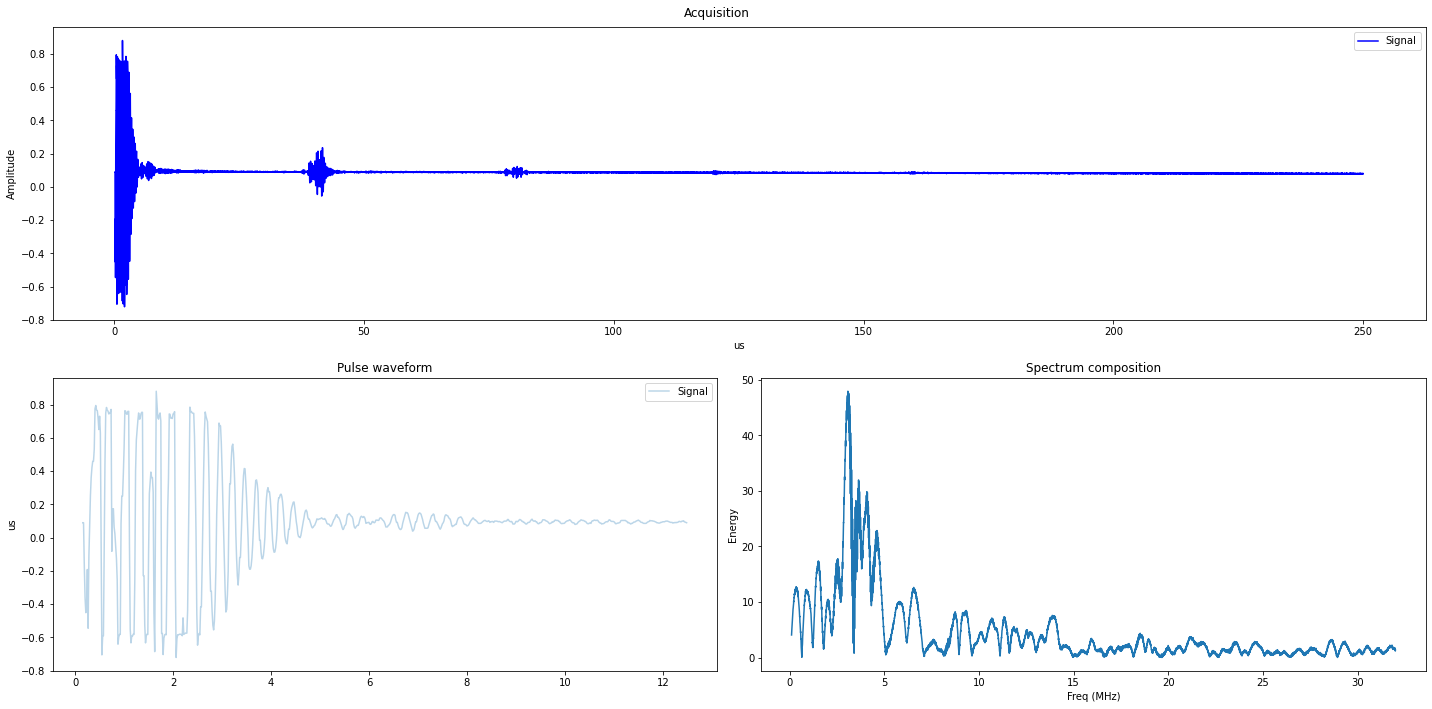